In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
subject = 'junior data analyst'
place = 'Canada'

In [3]:
web_pages = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, 0)
req = requests.get(web_pages)
soup = BeautifulSoup(req.text, "lxml")

In [4]:
actual_page = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+1])
total_pages = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+3].replace(',',''))

In [5]:
name = []
company = []
location = []

In [6]:
total_pages

36

In [7]:
for i in range(total_pages):
    print('Page {}'.format(i+1))
    if i%10 == 0:
        time.sleep(5)
    link_offers = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, i*10)
    req = requests.get(link_offers)
    soup = BeautifulSoup(req.text, "lxml")
    
    for job_offer in soup.find_all("div", "jobsearch-SerpJobCard unifiedRow row result"):
        name.append(job_offer.a['title'])
        company.append(job_offer.find('span','company').text.strip())
        try:
            location.append(job_offer.find('span','location accessible-contrast-color-location').text.strip())
        except:
            location.append(job_offer.find('span','remote').text.strip())

Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20
Page 21
Page 22
Page 23
Page 24
Page 25
Page 26
Page 27
Page 28
Page 29
Page 30
Page 31
Page 32
Page 33
Page 34
Page 35
Page 36


In [8]:
df = pd.DataFrame(data=zip(name, company, location), columns=["Name", "Company", 'Location'])

In [9]:
df

,Name,Company,Location
0,Junior Business Analyst,Simon Fraser University,"Vancouver, BC"
1,Junior Data Analyst - Relational/SQL Data Bases,GHD,"Waterloo, ON"
2,Junior Data Analyst,University of Waterloo,"Waterloo, ON"
3,Junior IT Business Analyst,Federated Co-operatives Limited,"Saskatoon, SK"
4,Junior Data Analyst,Showbie,"Edmonton, AB"
...,...,...,...
517,Junior Data Analyst,Ayima,"Vancouver, BC"
518,Jr. Business & Systems Integration Analyst (We...,Plexxis Software,"Victoria, BC"
519,BI Developer (Contract),Upper Canada Forest Products,"Mississauga, ON"
520,"Jr. Business Analyst, Inventory Control",Toronto Research Chemicals Inc.,"Toronto, ON"


In [10]:
df.to_csv('{}.csv'.format(subject))

In [11]:
#df = pd.read_csv('geomatics.csv')
#df = pd.read_csv('Python_500.csv')
#df = pd.read_csv('Gis_Analyst.csv')

In [12]:
df.Location.value_counts().to_dict()

{'Vancouver, BC': 116,
 'Toronto, ON': 101,
 'Mississauga, ON': 73,
 'Edmonton, AB': 72,
 'Montréal, QC': 46,
 'Victoria, BC': 34,
 'Remote': 34,
 'Winnipeg, MB': 20,
 'Calgary, AB': 14,
 'Mont-Saint-Hilaire, QC': 2,
 'Waterloo, ON': 2,
 'Hamilton, ON': 2,
 'Halifax, NS': 1,
 'Saskatoon, SK': 1,
 'Burnaby, BC': 1,
 'Oakville, ON': 1,
 'Markham, ON': 1,
 'London, ON': 1}

In [13]:
df['Province'] = df.Location.apply(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else 'No data')

In [14]:
count_provinces = df.Province.value_counts().to_dict()
'PEI' in count_provinces.keys()

False

In [15]:
provinces = gpd.read_file('/home/shade/Personal_dev/geojobs/Data/lpr_000b16a_e/lpr_000b16a_e.shp')    

In [16]:
provinces['prefix'] = ['NL','PEI','NS','NB','QC','ON','MB','SK','AB','BC','YK','NWT','NT']

In [17]:
provinces['Frecuency'] = provinces['prefix'].apply(lambda x: count_provinces[x] if x in count_provinces.keys() else 0)

In [18]:
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry,prefix,Frecuency
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,0
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",PEI,0
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",NS,1
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",NB,0
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,48
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",ON,181
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",MB,20
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640...",SK,1
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463...",AB,86
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194...",BC,151


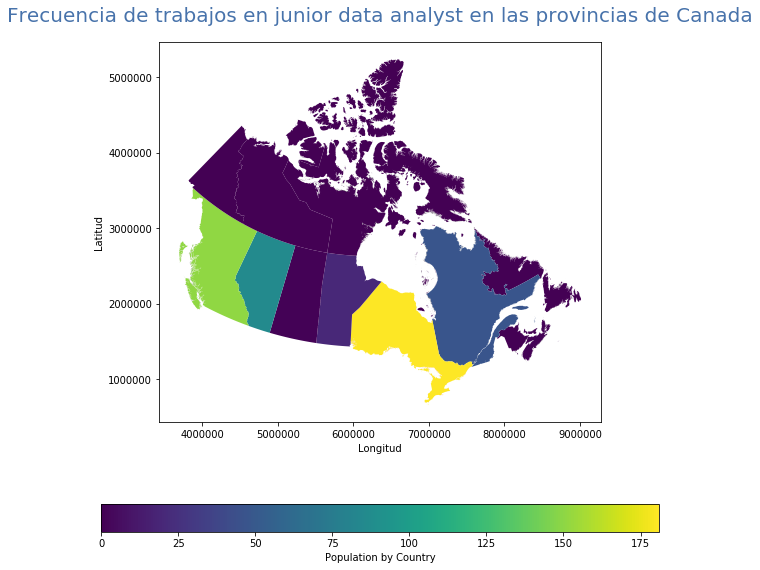

In [19]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Frecuencia de trabajos en {} en las provincias de Canada'.format(subject), 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
provinces.plot(column='Frecuency', cmap='viridis', ax=ax, zorder=5, legend=True, 
               legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})

In [20]:
"""m = folium.Map(location=[58, -102], zoom_start=3)

folium.Choropleth(
    geo_data=provinces,
    name='choropleth',
    data=provinces,
    columns=['prefix', 'Frecuency'],
    key_on='feature.properties.prefix',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Geomatics job offering'
).add_to(m)

folium.LayerControl().add_to(m)

m"""

"m = folium.Map(location=[58, -102], zoom_start=3)\n\nfolium.Choropleth(\n    geo_data=provinces,\n    name='choropleth',\n    data=provinces,\n    columns=['prefix', 'Frecuency'],\n    key_on='feature.properties.prefix',\n    fill_color='YlOrRd',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Geomatics job offering'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)\n\nm"